# PBL5: HỆ THỐNG NHẬN DIỆN CHẤT LƯỢNG TRÁI CAM VÀNG
### Thành viên:
- Nguyễn Thị Hồng Diễm
- Nguyễn Phương Hà
- Lê Nguyễn Yến Nhi
- Tô Phan Thùy Phương

## Import

In [12]:
from tensorflow.keras.applications import MobileNetV2
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import tensorflow as tf

import os
import math

import matplotlib.pyplot as plt;

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
destination_dir = '/content/drive/MyDrive/1605/fruit_dataset'
train_dir = os.path.join(destination_dir, 'train')
validation_dir = os.path.join(destination_dir, 'validation')
test_dir = os.path.join(destination_dir, 'test')

In [4]:

train_datagen = ImageDataGenerator(
    rescale=1./255,
    width_shift_range=0.2,
    height_shift_range=0.2,
    shear_range=0.2,
    zoom_range=[0.5, 1.0],
    rotation_range=90,
    horizontal_flip=True,
    vertical_flip=True,
    fill_mode='reflect'
)
validation_datagen = ImageDataGenerator(rescale=1./255)


## Image Data Generator

In [5]:
train_generator = train_datagen.flow_from_directory(train_dir,
                                                    batch_size=32,
                                                    color_mode="rgb",
                                                    target_size=(224,224),
                                                    class_mode='binary')

validation_generator = validation_datagen.flow_from_directory(validation_dir,
                                                         batch_size=32,
                                                         color_mode="rgb",
                                                         target_size=(224,224),
                                                         class_mode='binary')

Found 1158 images belonging to 2 classes.
Found 388 images belonging to 2 classes.


# Transfer Learning

In [6]:
from keras.layers import Dropout, Flatten, Dense
from keras.models import Model
from tensorflow.keras.optimizers import Adam


In [7]:
base_model = MobileNetV2(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
for layer in base_model.layers:
    layer.trainable = False
x = base_model.output
x = Flatten()(x)
x = Dense(128, activation="relu",kernel_regularizer=tf.keras.regularizers.L2(0.01))(x)
x = Dropout(0.15)(x)

predictions = Dense(1, activation='sigmoid')(x)

model = Model(inputs=base_model.input, outputs=predictions)

model.compile(optimizer=Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

model.summary()

9406464/9406464 [==============================] - 0s 0us/step
Model: "model"
__________________________________________________________________________________________________
 Layer (type)                Output Shape                 Param #   Connected to                  
 input_1 (InputLayer)        [(None, 224, 224, 3)]        0         []                            
                                                                                                  
 Conv1 (Conv2D)              (None, 112, 112, 32)         864       ['input_1[0][0]']             
                                                                                                  
 bn_Conv1 (BatchNormalizati  (None, 112, 112, 32)         128       ['Conv1[0][0]']               
 on)                                                                                              
                                                                                                  
 Conv1_relu (ReLU)           (N

In [8]:
train_len = 0
for foldername in os.listdir(os.path.join(destination_dir, 'train')):
    train_len = train_len + len(os.listdir(os.path.join(destination_dir,'train',foldername)))

val_len = 0
for foldername in os.listdir(os.path.join(destination_dir, 'validation')):
    val_len = val_len + len(os.listdir(os.path.join(destination_dir, 'validation',foldername)))

print(train_len)
print(val_len)

1158
388


## Custom Callbacks function

In [9]:
epochs = 60
batch_size= 32

checkpoint_filepath = os.path.join(
    '/content/drive/MyDrive/1605/dfr_check_points',
    "{epoch:03d}-{val_loss:.4f}.h5",
)

checkpoint = tf.keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,
    save_weights_only=False,
    monitor='val_loss',
    mode='min',
    save_best_only=True,
)

early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', mode='min', verbose = 1, patience=3, restore_best_weights=True)

callbacks = [checkpoint, early_stopping]

## Train model

In [10]:
history = model.fit(
    train_generator,
    steps_per_epoch=(train_len/batch_size),
    epochs=epochs,
    verbose=1,
    callbacks=callbacks,
    validation_data=validation_generator,
    validation_steps=(val_len/batch_size)
)

Epoch 1/60
37/36 [==============================] - ETA: -2s - loss: 2.9311 - accuracy: 0.7927

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


36/36 [==============================] - 218s 6s/step - loss: 2.9311 - accuracy: 0.7927 - val_loss: 2.1223 - val_accuracy: 0.9227
Epoch 2/60
36/36 [==============================] - 23s 618ms/step - loss: 1.9867 - accuracy: 0.9076 - val_loss: 1.7512 - val_accuracy: 0.9356
Epoch 3/60
36/36 [==============================] - 26s 715ms/step - loss: 1.7022 - accuracy: 0.9145 - val_loss: 1.5327 - val_accuracy: 0.9536
Epoch 4/60
36/36 [==============================] - 24s 649ms/step - loss: 1.4945 - accuracy: 0.9326 - val_loss: 1.3817 - val_accuracy: 0.9510
Epoch 5/60
36/36 [==============================] - 24s 647ms/step - loss: 1.3422 - accuracy: 0.9344 - val_loss: 1.2423 - val_accuracy: 0.9536
Epoch 6/60
36/36 [==============================] - 22s 623ms/step - loss: 1.2345 - accuracy: 0.9361 - val_loss: 1.1294 - val_accuracy: 0.9588
Epoch 7/60
36/36 [==============================] - 25s 693ms/step - loss: 1.1412 - accuracy: 0.9404 - val_loss: 1.0472 - val_accuracy: 0.9536
Epoch 8/60
3

## Kết quả

### Accuracy and loss on train/val set

<Figure size 640x480 with 0 Axes>

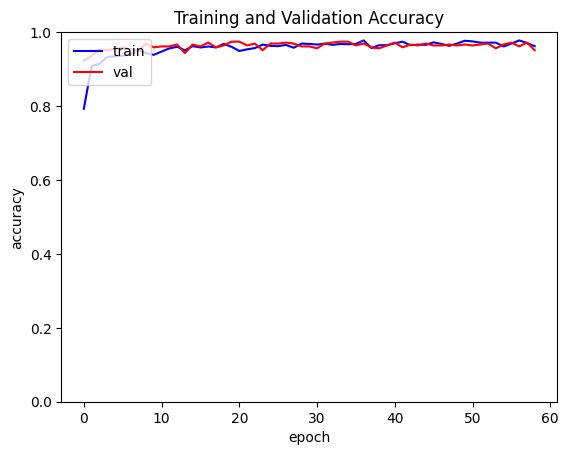

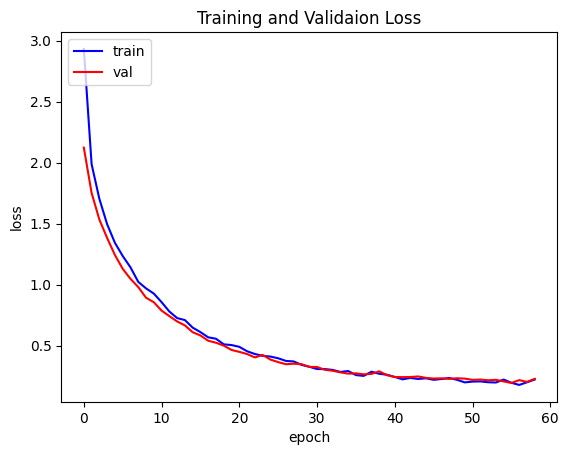

<Figure size 640x480 with 0 Axes>

In [11]:
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'b')
plt.plot(epochs, val_acc, 'r')
plt.title('Training and Validation Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.ylim(0, 1)
plt.figure()

plt.plot(epochs, loss, 'b')
plt.plot(epochs, val_loss, 'r')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.title('Training and Validaion Loss')
plt.figure()

In [13]:
test_datagen = ImageDataGenerator(rescale=1./255)

test_generator = test_datagen.flow_from_directory(test_dir,
                                                  batch_size=1,
                                                  target_size=(224, 224),
                                                  shuffle = False,
                                                  class_mode='binary')

filenames = test_generator.filenames
nb_samples = len(filenames)

loss, acc = model.evaluate(test_generator,steps = (nb_samples), verbose=1)
print('accuracy test: ',acc)
print('loss test: ',loss)

Found 385 images belonging to 2 classes.
385/385 [==============================] - 73s 182ms/step - loss: 0.1722 - accuracy: 0.9818
accuracy test:  0.9818181991577148
loss test:  0.17216303944587708


In [ ]:
from keras.models import load_model
from sklearn.metrics import classification_report

keras_model = tf.keras.models.load_model("/content/drive/MyDrive/1605/dfr_check_points/056-0.1938.h5")
test_predictions = keras_model.predict(test_generator)

# test_predictions = model.predict(test_generator)
predicted_classes = (test_predictions > 0.5).astype(int)

true_labels = test_generator.classes

print("Test Set Classification Report:")
print(classification_report(true_labels, predicted_classes))


385/385 [==============================] - 4s 9ms/step
Test Set Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.96      0.97       118
           1       0.98      0.99      0.99       267

    accuracy                           0.98       385
   macro avg       0.98      0.97      0.98       385
weighted avg       0.98      0.98      0.98       385



## Confusion matrix

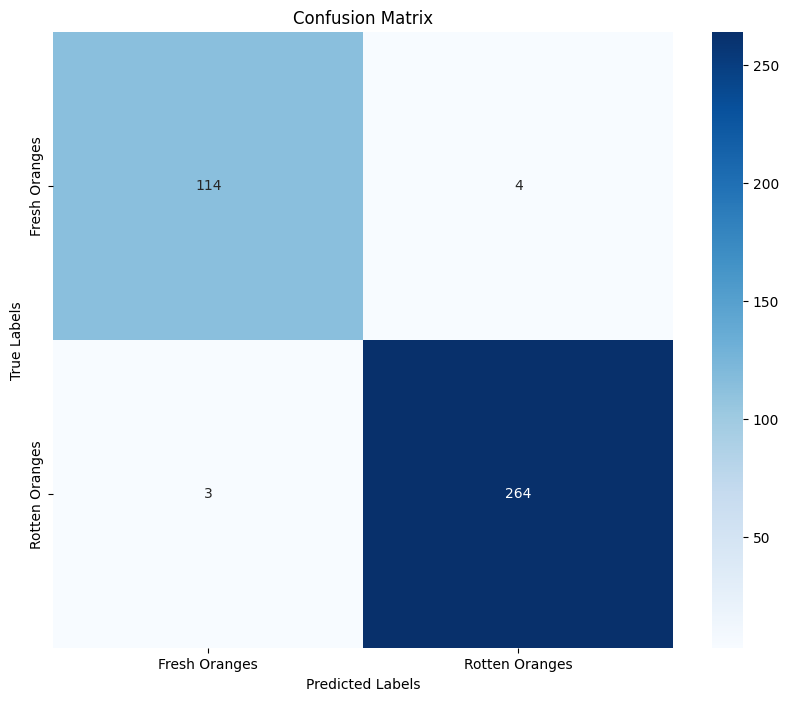

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

# Plot the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=test_generator.class_indices.keys(), yticklabels=test_generator.class_indices.keys())
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.title('Confusion Matrix')
plt.show()

### Save model

In [ ]:
model.save('mobilenet_final1605.h5')

### This cell is being run on Google Colab. Please ignore this cell if you are not using Google Colab

Saving pngtree-one-orange-fresh-orange-png-image_2329747.jpg to pngtree-one-orange-fresh-orange-png-image_2329747.jpg
Saving images (2).jfif to images (2).jfif
Saving images (1).jfif to images (1).jfif
Saving istockphoto-477836156-612x612.jpg to istockphoto-477836156-612x612.jpg
Saving download (1).jfif to download (1).jfif
Saving download.jfif to download.jfif
Saving fresh-orange.png to fresh-orange.png
Saving fresh-orange-fruit.jpg to fresh-orange-fruit.jpg
Saving 21a28665-7c82-4c12-b8af-e86a51af1999.jfif to 21a28665-7c82-4c12-b8af-e86a51af1999.jfif
Saving 3fc120e6-7910-4760-9492-3aa8abd6ce05.jfif to 3fc120e6-7910-4760-9492-3aa8abd6ce05.jfif
Saving 806b5f7a-d384-4da5-ace8-a1093fe4c24a.jfif to 806b5f7a-d384-4da5-ace8-a1093fe4c24a.jfif
Saving 7599117b-4dc9-4c0d-984f-212bec9c1461.jfif to 7599117b-4dc9-4c0d-984f-212bec9c1461.jfif
Saving 9131a34a-8b91-40c9-935d-c687a0f767a5.jfif to 9131a34a-8b91-40c9-935d-c687a0f767a5.jfif
Saving 1e7f63db-bba5-4d4c-a11b-f73ebb5f4551.jfif to 1e7f63db-bba5-

<ipython-input-17-3409671bc625>:44: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"


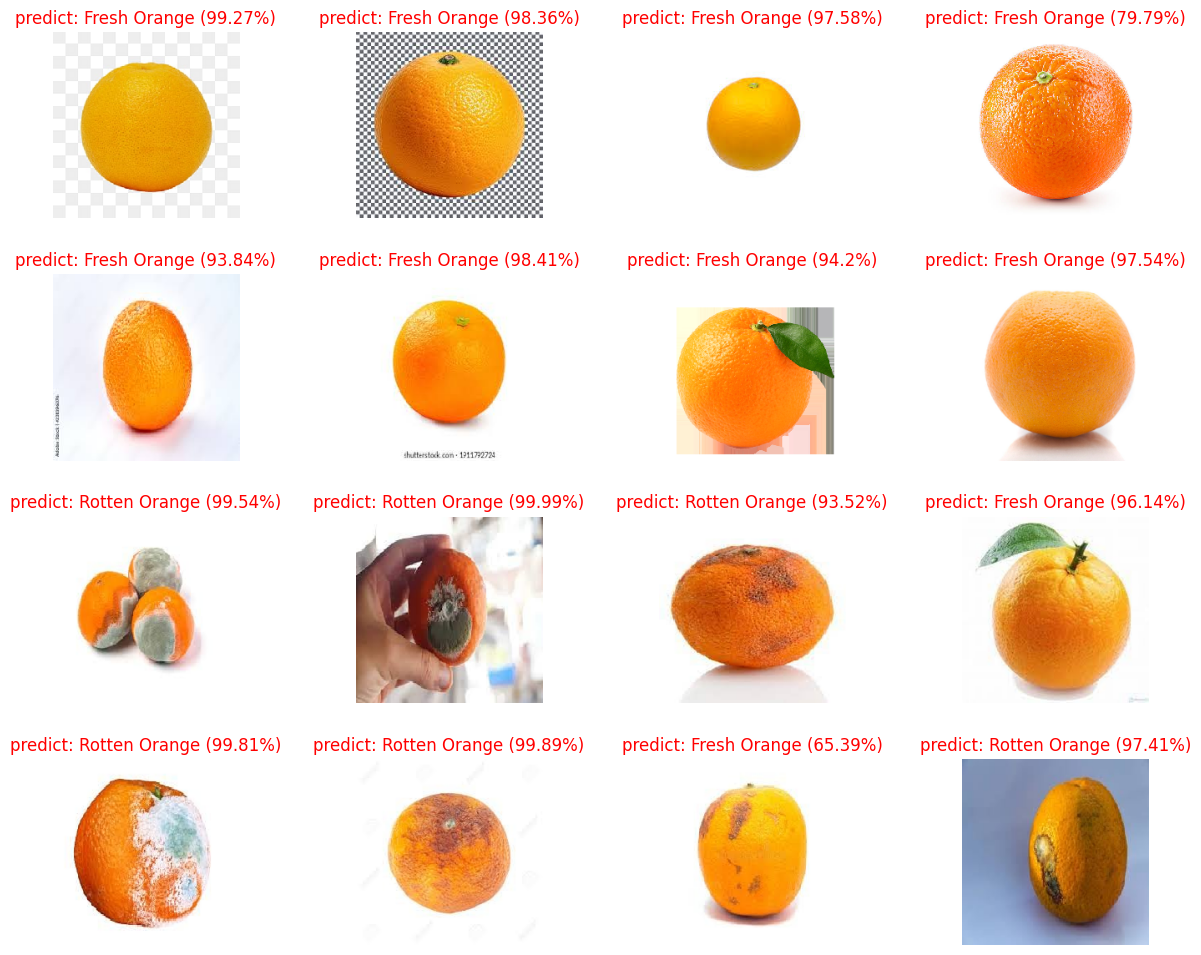

In [ ]:
from keras.utils import get_file
import pathlib
import cv2
from google.colab import files #USING IN COLAB
from keras.preprocessing import image
import numpy as np

model_predict = tf.keras.models.load_model('mobilenet_final1205.h5')
model_predict.compile(optimizer='adam',
                      loss='binary_crossentropy',
                      metrics=['accuracy'])

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  # imgplot = plt.imshow(img)
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  images = np.vstack([img])
  classes = model_predict.predict(images, batch_size=10)
  label = np.where(classes[0] > 0.5, 1,0)
  # print(label)
  if label == 0:
    image_name.append(fn)
    image_conf.append(1.0 - classes[0])
    predict_result.append('Fresh Orange')
  else:
    image_name.append(fn)
    image_conf.append(classes[0])
    predict_result.append('Rotten Orange')

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((math.ceil(len(image_name)/4))+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Fruit':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')

# TEST DETECTION AND PREDICTION

#### Predict function

In [ ]:
from keras.models import load_model
from keras.preprocessing import image

model = load_model("mobilenet_final1605.h5")

def predict_and_display(image_path):
    img = image.load_img(image_path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
    img = image.img_to_array(img)
    img = np.expand_dims(img, axis=0)
    img = img / 255.0  # Chuan hoa

    prediction = model.predict(img)

    label = "Fresh Orange" if prediction[0][0] > 0.5 else "Rotten Orange"
    confidence = prediction[0][0] if label == "Fresh Orange" else 1.0 - prediction[0][0]

    plt.imshow(image.load_img(image_path, color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
    title = f"Prediction: {label} ({round(float(confidence) * 100, 2)}%)"
    if label == 'Fresh Orange':
        plt.title(title, color='black')
    else:
        plt.title(title, color='red')
    plt.axis('off')
    plt.show()


#### Detect object program

In [ ]:
import cv2
import time
import numpy as np
from random import randint

CAMERA_DEVICE_ID = 1 # 1 for webcam and 0 for laptop's camera
IMAGE_WIDTH = 320
IMAGE_HEIGHT = 240
fps = 0


def visualize_fps(image, fps: int):
    if len(np.shape(image)) < 3:
        text_color = (255, 255, 255)  # white
    else:
        text_color = (0, 255, 0)  # green
    row_size = 20  # pixels
    left_margin = 24  # pixels

    font_size = 1
    font_thickness = 1

    # Draw the FPS counter
    fps_text = 'FPS = {:.1f}'.format(fps)
    text_location = (left_margin, row_size)
    cv2.putText(image, fps_text, text_location, cv2.FONT_HERSHEY_PLAIN,
                font_size, text_color, font_thickness)

    return image

1/1 [==============================] - 0s 229ms/step


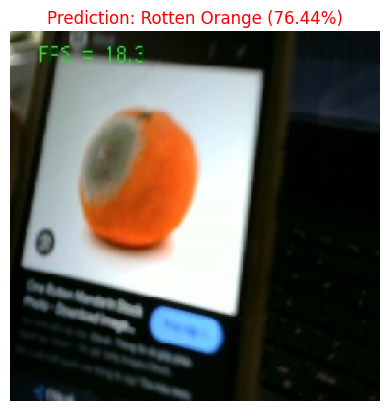

1/1 [==============================] - 0s 61ms/step


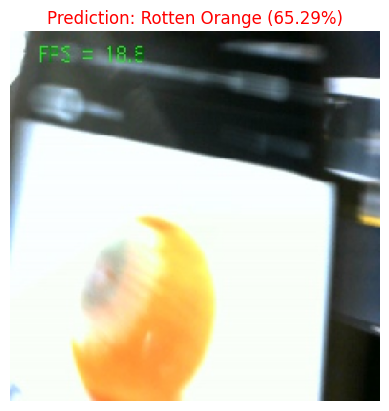

1/1 [==============================] - 0s 59ms/step


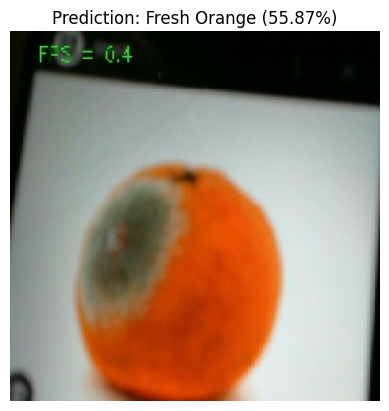

1/1 [==============================] - 0s 55ms/step


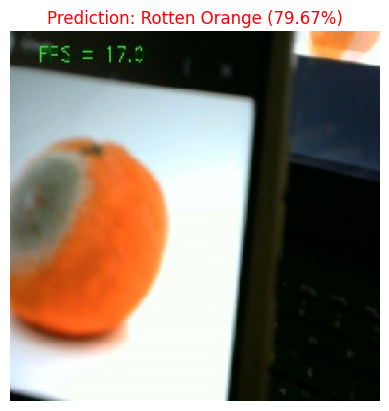

1/1 [==============================] - 0s 61ms/step


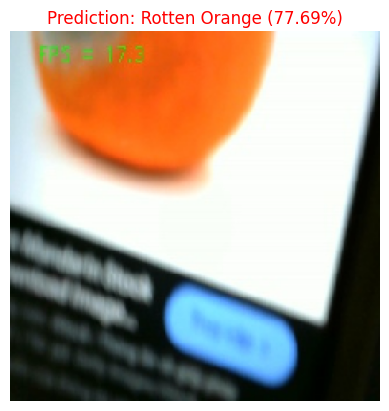

1/1 [==============================] - 0s 48ms/step


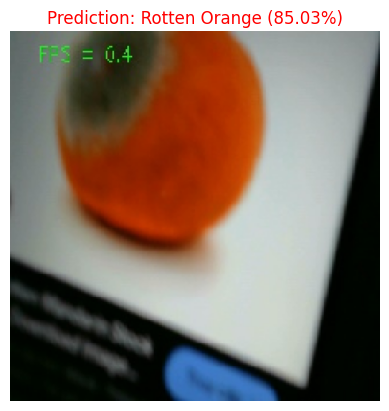

1/1 [==============================] - 0s 65ms/step


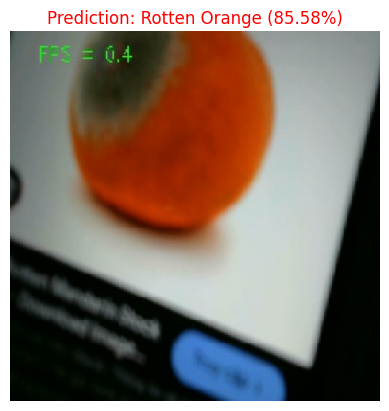

1/1 [==============================] - 0s 44ms/step


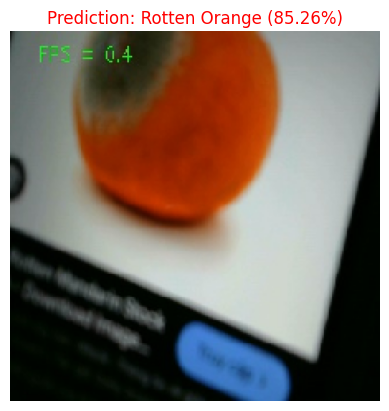

1/1 [==============================] - 0s 50ms/step


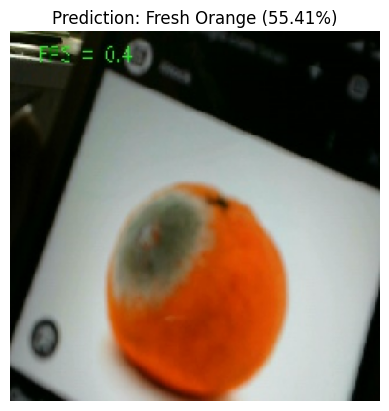

In [ ]:
try:
    # create video capture
    cap = cv2.VideoCapture(CAMERA_DEVICE_ID)

    # set resolution to 320x240 to reduce latency
    cap.set(3, IMAGE_WIDTH)
    cap.set(4, IMAGE_HEIGHT)

    capture_image = False  # Flag to capture image when True

    # Load the object detection model
    with open('coco.names','rt') as f:
        class_names = f.read().rstrip('\n').split('\n')

    class_colors = []
    for i in range(len(class_names)):
        class_colors.append((randint(0,255), randint(0,255), randint(0,255)))

    model_path = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
    weight_path = 'frozen_inference_graph.pb'

    net = cv2.dnn_DetectionModel(weight_path, model_path)
    net.setInputSize(320, 320)
    net.setInputScale(1.0/127.5)
    net.setInputMean((127.5, 127.5, 127.5))
    net.setInputSwapRB(True)

    # Loop to continuously get images
    while True:
        # Record start time
        start_time = time.time()

        # Read the frame from the camera
        _, frame = cap.read()

        # Object detection
        classIds, confs, bbox = net.detect(frame, confThreshold=0.5)
        if len(classIds) != 0:
            for classId, confidence, box in zip(classIds.flatten(), confs.flatten(), bbox):
                # Check if the detected object is 'orange'
                if class_names[classId-1].lower() == 'orange':
                    capture_image = True  # Set flag to True

        # Display frame with FPS
        frame_with_fps = visualize_fps(frame, fps)
        cv2.imshow('Object Detection', frame_with_fps)

        # If capture_image flag is True and any key is pressed, save the image
        if capture_image:
            cv2.imwrite('orange_detected.jpg', frame_with_fps)
            predict_and_display('orange_detected.jpg')
            capture_image = False  # Reset the flag
            time.sleep(2)  # Optional delay to prevent multiple captures

        # Record end time
        end_time = time.time()

        # Calculate FPS
        seconds = end_time - start_time
        fps = 1.0 / seconds
        # print("Estimated FPS: {:.1f}".format(fps))

        # Check for 'Esc' key press to exit the loop
        if cv2.waitKey(1) == 27:
            break

except Exception as e:
    print(e)

finally:
    # Clean up and exit the program
    cv2.destroyAllWindows()
    cap.release()


In [ ]:
import keras
keras.__version__

'2.15.0'

## TEST TF Lite

### Convert to TFLite

In [ ]:
keras_model = tf.keras.models.load_model("/content/drive/MyDrive/1605/dfr_check_points/056-0.1938.h5")
converter = tf.lite.TFLiteConverter.from_keras_model(keras_model)
# converter.optimizations = [tf.lite.Optimize.DEFAULT] # sử dụng optimization nếu cần tối ưu thêm
tflite_model = converter.convert()
with open('model_mobilenetv2_1605.tflite', 'wb') as f:
  f.write(tflite_model)


#### Sử dụng optimization và không

Saving 1.PNG to 1.PNG
Saving 2.PNG to 2.PNG


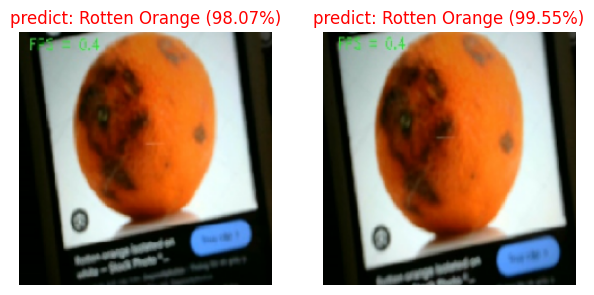

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from google.colab import files

# Load mô hình TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path="/content/model_mobilenetv2_optimized.tflite")
interpreter.allocate_tensors()

# Lấy thông số của đầu vào và đầu ra
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  # Chuẩn bị dữ liệu đầu vào cho mô hình TensorFlow Lite
  interpreter.set_tensor(input_details[0]['index'], img)

  # Chạy inference
  interpreter.invoke()

  # Lấy kết quả
  output_data = interpreter.get_tensor(output_details[0]['index'])

  # Xử lý kết quả dự đoán
  label = np.where(output_data > 0.5, 1, 0)[0][0]
  confidence = output_data[0][0] if label == 1 else 1.0 - output_data[0][0]

  if label == 0:
    predict_result.append('Fresh Orange')
  else:
    predict_result.append('Rotten Orange')

  image_name.append(fn)
  image_conf.append(confidence)

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((math.ceil(len(image_name)/4))+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Orange':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')


#### Không sử dụng optimization

Saving pngtree-one-orange-fresh-orange-png-image_2329747.jpg to pngtree-one-orange-fresh-orange-png-image_2329747.jpg
Saving images (2).jfif to images (2) (1).jfif
Saving images (1).jfif to images (1) (1).jfif
Saving istockphoto-477836156-612x612.jpg to istockphoto-477836156-612x612.jpg
Saving download (1).jfif to download (1) (1).jfif
Saving download.jfif to download.jfif
Saving fresh-orange.png to fresh-orange.png
Saving fresh-orange-fruit.jpg to fresh-orange-fruit.jpg
Saving 806b5f7a-d384-4da5-ace8-a1093fe4c24a.jfif to 806b5f7a-d384-4da5-ace8-a1093fe4c24a.jfif
Saving 9131a34a-8b91-40c9-935d-c687a0f767a5.jfif to 9131a34a-8b91-40c9-935d-c687a0f767a5.jfif
Saving 1e7f63db-bba5-4d4c-a11b-f73ebb5f4551.jfif to 1e7f63db-bba5-4d4c-a11b-f73ebb5f4551.jfif
Saving 70889c05-4427-4021-9291-d23d64bfb844.jfif to 70889c05-4427-4021-9291-d23d64bfb844.jfif
Saving c298a01b-b7de-417b-970c-29ad42dfb329.jfif to c298a01b-b7de-417b-970c-29ad42dfb329.jfif
Saving 825457d0-bc32-4d06-87ab-e6e625929ec8.jfif to 82

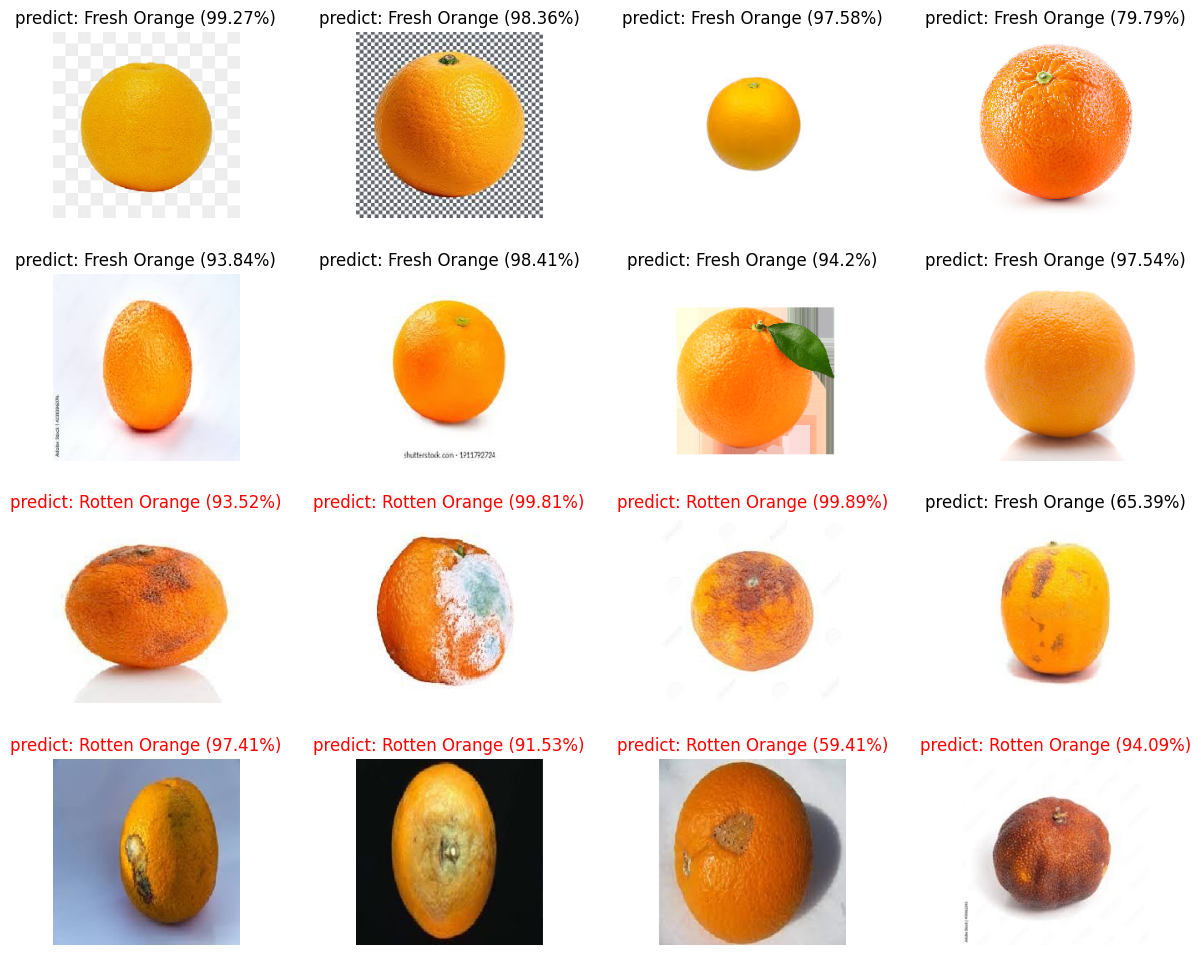

In [ ]:
import tensorflow as tf
from keras.preprocessing import image
import numpy as np
import matplotlib.pyplot as plt
import math
import os
from google.colab import files

# Load mô hình TensorFlow Lite
interpreter = tf.lite.Interpreter(model_path="/content/model_mobilenetv2_1605.tflite")
interpreter.allocate_tensors()

# Lấy thông số của đầu vào và đầu ra
input_details = interpreter.get_input_details()
output_details = interpreter.get_output_details()

uploaded = files.upload()
image_name = []
image_conf = []
predict_result = []

for fn in uploaded.keys():
  path = fn
  img = image.load_img(path, color_mode="rgb", target_size=(224, 224), interpolation="nearest")
  img = image.img_to_array(img)
  img = np.expand_dims(img, axis=0)
  img = img/255

  # Chuẩn bị dữ liệu đầu vào cho mô hình TensorFlow Lite
  interpreter.set_tensor(input_details[0]['index'], img)

  # Chạy inference
  interpreter.invoke()

  # Lấy kết quả
  output_data = interpreter.get_tensor(output_details[0]['index'])

  # Xử lý kết quả dự đoán
  label = np.where(output_data > 0.5, 1, 0)[0][0]
  confidence = output_data[0][0] if label == 1 else 1.0 - output_data[0][0]

  if label == 0:
    predict_result.append('Fresh Orange')
  else:
    predict_result.append('Rotten Orange')

  image_name.append(fn)
  image_conf.append(confidence)

plt.figure(figsize=(15, 15))
for n in range(len(image_name)):
  plt.subplot((math.ceil(len(image_name)/4))+1, 4, n+1)
  plt.subplots_adjust(hspace = 0.3)
  plt.imshow(image.load_img(image_name[n], color_mode="rgb", target_size=(224, 224), interpolation="nearest"))
  title = f"predict: {predict_result[n]} ({round(float(image_conf[n])*100, 2)}%)"
  if predict_result[n] == 'Fresh Orange':
    plt.title(title, color='black')
  else:
    plt.title(title, color='red')

  plt.axis('off')
plt.show()

for fn in image_name:
  os.system(f'rm {fn}')
